## This notebook contains:
### 01. Import libraries and data
### 02. Create hidden gem variable

The hidden gem variable is an effort to measure a property's rent relative to the population growth in the district where it's located (a measure that would likely indicate the area is a desirable place to live). I mapped this variable in the Tableau presentation that accompanies this project.

# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn

In [2]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path = r'C:\Users\jacym\Desktop\Career Foundry projects\german rent'

In [70]:
# Import rent data

df = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'rent_districts_mapping.csv'), index_col = False)

In [5]:
df.head()

,scoutId,regio1,baseRent,totalRent,pricetrend,livingSpace,plz,picturecount,newlyConst,yearConstructed,...,population,populationTrend,popTrendCat,surfaceArea,populationDensity,space/person,people/apt,districtPopTrend,districtPop,price/unit
0,96107057,Nordrhein-Westfalen,595.0,840.00,4.62,86.00,44269,6,False,1965.0,...,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010,9.767442
1,92798563,Nordrhein-Westfalen,972.6,1320.65,3.76,87.00,44229,12,True,2018.0,...,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010,15.179885
2,114894763,Nordrhein-Westfalen,396.8,493.80,4.10,62.00,44137,0,False,1958.0,...,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010,7.964516
3,90046012,Nordrhein-Westfalen,310.0,460.00,3.28,55.00,44329,14,False,1930.0,...,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010,8.363636
4,87928570,Nordrhein-Westfalen,301.0,NaN,4.41,30.07,44137,31,False,1979.0,...,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010,NaN


In [6]:
df.shape

(257607, 40)

In [7]:
df.isnull().sum()

scoutId                     0
regio1                      0
baseRent                    0
totalRent               39303
pricetrend               1708
livingSpace                70
plz                         0
picturecount                0
newlyConst                  0
yearConstructed         54395
firingTypes             54416
heatingType             42643
hasKitchen                  0
cellar                      0
condition               64656
street                      0
lift                        0
typeOfFlat              34068
noRooms                     0
floor                   49404
balcony                     0
garden                      0
baseRentRange               0
noRoomsRange                0
livingSpaceRange            0
yearConstructedRange    54395
regio2                      0
regio3                      0
description             18209
date                        0
population                  0
populationTrend             0
popTrendCat                 0
surfaceAre

In [9]:
pd.set_option('display.max_columns', 500)

# 02. Create hidden gem variable

In [71]:
# create hidden gem variable 
df['hiddenGem'] = df['districtPopTrend']/df['price/unit']

<Axes: xlabel='hiddenGem', ylabel='Count'>

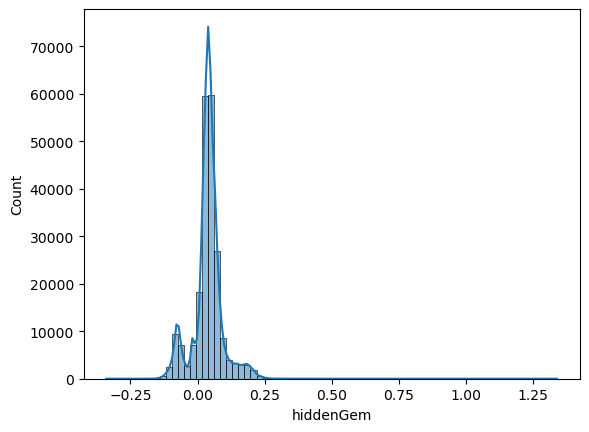

In [27]:
# check variable distribution
sns.histplot(df['hiddenGem'], bins=75, kde = True)

In [13]:
# view variable statistics
df.agg({'hiddenGem':['mean', 'median', 'min', 'max', 'std']})

,hiddenGem
mean,0.039438
median,0.041057
min,-0.339873
max,1.338375
std,0.056289


In [12]:
# view hidden gem stats by state
df.groupby('regio1').agg({'hiddenGem':['mean', 'median', 'min', 'max', 'std']})

hiddenGem                                        
                            mean    median       min       max       std
regio1                                                                  
Baden-Württemberg       0.050888  0.048660  0.003257  0.410667  0.021381
Bayern                  0.053418  0.049031 -0.078979  0.719333  0.029675
Berlin                  0.066840  0.065115  0.012606  0.316400  0.020149
Brandenburg             0.030845  0.028485 -0.183318  0.243750  0.070112
Bremen                  0.051561  0.042411  0.014000  0.378583  0.024432
Hamburg                 0.055888  0.055321  0.010424  0.367347  0.015140
Hessen                  0.051969  0.050750 -0.004737  0.919098  0.024745
Mecklenburg-Vorpommern  0.046998  0.039667 -0.007073  0.163951  0.035772
Niedersachsen           0.041006  0.042953 -0.082105  0.335378  0.034415
Nordrhein-Westfalen     0.034878  0.031970 -0.015313  0.379826  0.018267
Rheinland-Pfalz         0.046805  0.045493 -0.040000  0.245000  0.020966
Saarland                0.006208  0.013529 -0.041667  0.045190  0.014299
Sachsen                 0.048635  0.042104 -0.237250  1.338375  0.089202
Sachsen-Anhalt         -0.011976 -0.013937 -0.243295  0.202083  0.065031
Schleswig-Holstein      0.053437  0.050933  0.007714  0.200454  0.027188
Thüringen              -0.004232 -0.019339 -0.339873  0.690319  0.080563

In [24]:
# view median hiddenGem value for each district
district_gems = df.groupby(['regio2']).agg({'hiddenGem':['median']})

In [25]:
district_gems.to_clipboard()

In [54]:
# if hidden gem value is >= .0613, print 1 in new column called isGem
# this threshold designates the top 25% of values as hidden gems
df.loc[df['hiddenGem'] >= 0.0613 , 'isGem'] = 1
df.loc[df['hiddenGem'] < 0.0613 , 'isGem'] = 0

In [55]:
df['isGem'].value_counts()

0.0    163756
1.0     54495
Name: isGem, dtype: int64

In [67]:
# determine gem count per district and gem percentage 
district_gem_count = df.groupby(['regio2']).agg({'scoutId':['count'], 'isGem':['sum']})
district_gem_count.to_clipboard()

Note: I used this information to determine which districts have the highest total number of hidden gems and which districts have the highest percentage of hidden gems (relative to total properties). These districts can be viewed in a combination map in the accompanying Tableau presentation.